In [1]:
from readXfoilPolar import read2Dpolar, readPolar
import aerosandbox.numpy as np
import pandas as pd
import pathlib as plb
import matplotlib.pyplot as plt
import aerosandbox as asb

In [2]:
# set up data
naca2412_files = [
    plb.Path("naca2412_no_flap"),
    plb.Path("naca2412_10deg_080_10"),
    plb.Path("naca2412_20deg_080_10"),
    plb.Path("naca2412_30deg_080_10")
]
naca0012_files = [
    plb.Path("naca0012_0deg_080"),
    plb.Path("naca0012_10deg_080"),
    plb.Path("naca0012_20deg_080"),
    plb.Path("naca0012_30deg_080")
]

dim2name = "flap_ang"
dim2values = np.array([0,10,20,30])

In [3]:
naca2412_dataset = read2Dpolar(naca2412_files,dim2name,dim2values)
naca0012_dataset = read2Dpolar(naca0012_files,dim2name,dim2values,mirror=True)

In [4]:
from airfoilPerformanceModels import dragCoefficientFlapAlfa, liftCoefficientFlapAlfa, momentCoefficientFlapAlfa
from Airfoil2DSection import Airfoil2DSection
ds = naca0012_dataset


x = {
    "alpha":np.array(ds.loc[:,'alpha']),
    "flap_ang":np.array(ds.loc[:,'flap_ang'])
}
p = {"alfa_l":1,
     "alfa_q":0,
     "flap_l":1,
     "flap_q":0,
     "const":.1,
     "co_l": 0.1
     }

amodel = Airfoil2DSection()

In [5]:
amodel.fit("CL",
           model=liftCoefficientFlapAlfa,
           xdata={"alpha": np.array(ds.loc[:,'alpha']).flatten(),
                              "flap_ang":np.array(ds.loc[:,'flap_ang']).flatten()},
           ydata=np.array(ds.loc[:,"CL"]).flatten()
           )
amodel.fit("CD",
           model=dragCoefficientFlapAlfa,
           xdata={"alpha": np.array(ds.loc[:,'alpha']).flatten(),
                              "flap_ang":np.array(ds.loc[:,'flap_ang']).flatten()},
           ydata=np.array(ds.loc[:,"CD"]).flatten()
           )
amodel.fit("CM",
           model=momentCoefficientFlapAlfa,
           xdata={"alpha": np.array(ds.loc[:,'alpha']).flatten(),
                              "flap_ang":np.array(ds.loc[:,'flap_ang']).flatten()},
           ydata=np.array(ds.loc[:,"CM"]).flatten()
           )




This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       21

Total number of variables............................:        6
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  7.9915440e+03 0.00e+00 1.00e+02   0.0 0.00e+00    -  0.00e+00 0.00e+00 

In [6]:
out = amodel.generate2DGrid("CL",
                      x = {
                          'alpha':np.arange(-15,15,0.1),
                          'flap_ang': np.arange(-30,30,1)
                      })
out = amodel.generate2DGrid("CD",
                      x = {
                          'alpha':np.arange(-15,15,0.1),
                          'flap_ang': np.arange(-30,30,1)
                      })
out = amodel.generate2DGrid("CM",
                      x = {
                          'alpha':np.arange(-15,15,0.1),
                          'flap_ang': np.arange(-30,30,1)
                      })


(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='flap_ang', ylabel='alpha', zlabel='CM'>)

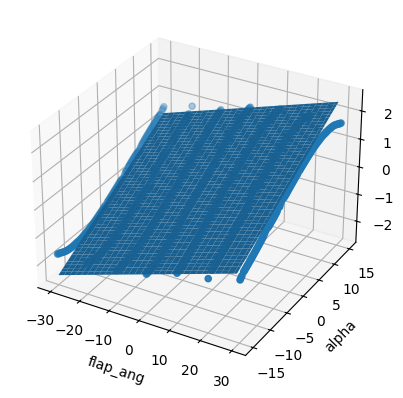

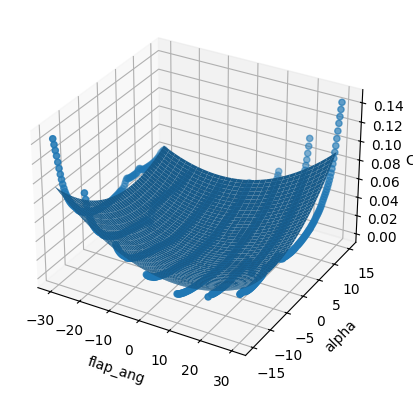

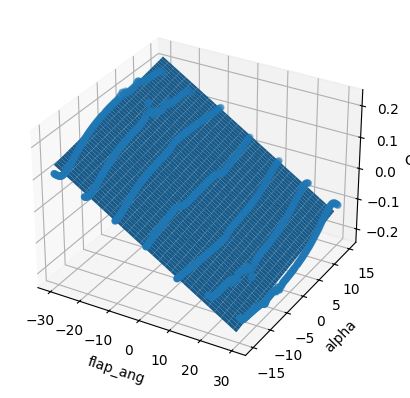

In [7]:
amodel.plot("CL","flap_ang","alpha",overlay_raw=True)
amodel.plot("CD","flap_ang","alpha",overlay_raw=True)
amodel.plot("CM","flap_ang","alpha",overlay_raw=True)

In [8]:
data = amodel.FittedModels["CL"].x_data
z = amodel.generate2DGrid("CL",data)


In [9]:
len(z["y"])

815

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='alpha', ylabel='flap_ang'>)

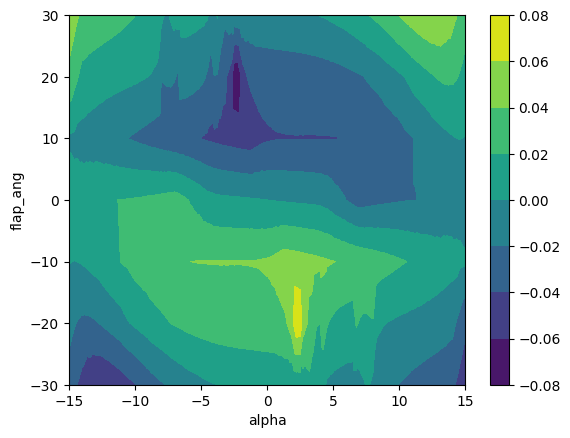

In [10]:
amodel.plot_err('CM','alpha','flap_ang')